In [3]:
import os
import numpy as np
import nibabel as nib

In [7]:
# # # just check the location of pancreas in every image in the GT

# for ii in range(82):
#     img = nib.load('./TCIA_pancreas_labels-02-05-2017/TCIA_pancreas_labels-02-05-2017/label00{0:0=2d}.nii.gz'.format(ii+1))
#     img_ = img.get_data()
#     flag=0
#     for i in range(img_.shape[-1]):
#         if np.max(img_[:,:,i]) == 1:
#             if flag==0:
#                 first_occurence = i
#             flag+=1
#     print ("number of slices :", img_.shape[-1], ", number of pancreas slices:", flag , 
#            ", from: ",first_occurence, ", to: ", (first_occurence + flag - 1) )

In [8]:
# # # This part is obsolete

# import os,cv2
# for ii in range(80):
#     PathIMGS = "./jpegs/DOI/PANCREAS_00{0:0=2d}/".format(ii+1)
    
#     lstFilesJPG = []
#     for dirName, subdirList, fileList in os.walk(PathIMGS):
#         for filename in fileList:
#             if ".jpg" in filename.lower():
#                 lstFilesJPG.append(os.path.join(dirName,filename))
#     ArrayDicom = np.zeros((128,128, len(lstFilesJPG)), dtype=int)
#     for filenameJPG in lstFilesJPG:
#         ds = cv2.imread(filenameJPG)
#         ds = cv2.cvtColor(ds, cv2.COLOR_BGR2RGB)
#         ds = cv2.resize(ds, (128, 128)) 
#         ArrayDicom[:, :, lstFilesJPG.index(filenameJPG)] = ds[:,:,0]

#     frac_num_of_3d_patch = len(lstFilesJPG)/64
#     full_num_of_3d_patch = (len(lstFilesJPG)//64)+1
#     temp = frac_num_of_3d_patch/full_num_of_3d_patch
    
#     for _ in range(full_num_of_3d_patch):
#         print (ArrayDicom[:, :, start : start + 64].shape)
#         start += int((temp * 64) - full_num_of_3d_patch) - 1

In [9]:
# # # resize DCM images to 224x224 size.


# import os, cv2, numpy as np
# for ii in range(80):
#     PathIMGS = "./jpegs/DOI/PANCREAS_00{0:0=2d}/".format(ii+1)
    
#     lstFilesJPG = []
#     for dirName, subdirList, fileList in os.walk(PathIMGS):
#         for filename in fileList:
#             if ".jpg" in filename.lower():
#                 lstFilesJPG.append(os.path.join(dirName,filename))
                
#     ArrayDicom = np.zeros((224,224, len(lstFilesJPG)), dtype=int)
#     for filenameJPG in lstFilesJPG:
#         ds = cv2.imread(filenameJPG)
#         ds = cv2.cvtColor(ds, cv2.COLOR_BGR2RGB)
#         ds = cv2.resize(ds, (224, 224)) 
#         ArrayDicom[:, :, lstFilesJPG.index(filenameJPG)] = ds[:,:,0]

In [10]:
# # # initialize the ResNet50 model to extract features at multiple scale. 
# # # the input volume was preprocessed to be at size 224x224x64

# from keras.applications.resnet50 import ResNet50
# from keras.preprocessing import image
# from keras.applications.resnet50 import preprocess_input, decode_predictions,GlobalAveragePooling2D,Dense, Input
# import numpy as np
# from keras.models import Model

# from keras.applications.resnet50 import preprocess_input
# from keras.preprocessing import image

# input_tensor = Input(shape=(224, 224, 3))
# base_model = ResNet50(weights='imagenet',input_tensor=input_tensor, include_top=False)
# model = Model(inputs=input_tensor, outputs= base_model.output)

In [11]:
# # # preprocess 224x224x64 volumes to extract features.



# def input_preprocessing(input_img_1):
    
#     x =  np.zeros((224,224,3),dtype=float)
    
#     x[:,:,0]= input_img_1
#     x[:,:,1]= input_img_1
#     x[:,:,2]= input_img_1
    
#     input_img = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
    
#     layer_name = 'activation_40'
#     intermediate_layer_model_14 = Model(inputs=base_model.input,
#                                      outputs=base_model.get_layer(layer_name).output)
#     intermediate_output_14 = intermediate_layer_model_14.predict(input_img)

#     layer_name = 'activation_22'
#     intermediate_layer_model_28 = Model(inputs=base_model.input,
#                                      outputs=base_model.get_layer(layer_name).output)
#     intermediate_output_28 = intermediate_layer_model_28.predict(input_img)

#     layer_name = 'activation_10'
#     intermediate_layer_model_55 = Model(inputs=base_model.input,
#                                      outputs=base_model.get_layer(layer_name).output)
#     intermediate_output_55 = intermediate_layer_model_55.predict(input_img)
    
#     return intermediate_output_14, intermediate_output_28, intermediate_output_55

In [12]:
# # # extract features from 3D volume in multiple scale (14, 28, 55) from ResNet50 and save them


# import scipy.io
# import numpy as np

# for ii in range(0,82):
#     path_mat = "./mat-files/224-224-64/00{0:0=2d}.mat".format(ii+1)
#     input_3d= scipy.io.loadmat(path_mat)
#     img3d = input_3d['resize_img3d']
    
#     x =  np.zeros((1, 14, 14, 1024, 64),dtype=float)
#     y =  np.zeros((1, 28, 28, 512, 64),dtype=float)
#     z =  np.zeros((1, 55, 55, 256, 64),dtype=float)

#     for i in range(img3d.shape[2]):
#         x[:,:,:,:,i] ,y[:,:,:,:,i] ,z[:,:,:,:,i] = input_preprocessing(img3d[:,:,0])
        
        
#     model_input={}
#     model_input['x']=x
#     model_input['y']=y
#     model_input['z']=z
    
    
#     save_name = "00{0:0=2d}.mat".format(ii+1)
#     scipy.io.savemat(save_name,model_input)

In [6]:
### idea: extract features from 3D image on multiple scale through ResNet50. Use that as an input to new model.

import keras
from keras.engine.topology import Input
from keras.layers import Conv3D, Concatenate, Add, PReLU, Conv3DTranspose
from keras.models import Model


input_layer_55 = Input(shape=(55, 55, 256, 64))
input_layer_28 = Input(shape=(28, 28, 512, 64))
input_layer_14 = Input(shape=(14, 14, 1024, 64))

# input_layer = [input_layer_55, input_layer_28, input_layer_14]
input_layer = [ input_layer_28, input_layer_14]


conv_1a = Conv3D(filters= 32, kernel_size=  (1, 1, 2), strides=  (1, 1, 2), padding='same')(input_layer_14)
prelu_1a = PReLU()(conv_1a)
conv_1b = Conv3D(filters= 32, kernel_size=  (1, 1, 2), strides=  (1, 1, 2), padding='same')(prelu_1a)
prelu_1b = PReLU()(conv_1b)
conv_1c = Conv3D(filters= 32, kernel_size=  (1, 1, 2), strides=  (1, 1, 2), padding='same')(prelu_1b)
prelu_1c = PReLU()(conv_1c)
conv_1c = Conv3D(filters= 32, kernel_size=  (1, 1, 2), strides=  (1, 1, 2), padding='same')(prelu_1b)
prelu_1c = PReLU()(conv_1c)
conv_1d = Conv3D(filters= 32, kernel_size=  (2, 2, 1), strides=  (2, 2, 1), padding='same')(prelu_1c)
prelu_1d = PReLU()(conv_1d)


conv_2a = Conv3D(filters= 32, kernel_size=  (1, 1, 4), strides=  (1, 1, 4), padding='same')(input_layer_28)
prelu_2a = PReLU()(conv_2a)
conv_2b = Conv3D(filters= 32, kernel_size=  (2, 2, 1), strides=  (2, 2, 1), padding='same')(prelu_2a)
prelu_2b = PReLU()(conv_2b)
conv_2c = Conv3D(filters= 32, kernel_size=  (2, 2, 1), strides=  (2, 2, 1), padding='same')(prelu_2b)
prelu_2c = PReLU()(conv_2c)

add_1_2 = Add()([prelu_1d, prelu_2c])

# conv_3a = Conv3D(filters= 32, kernel_size=  (2, 2, 2), strides=  (2, 2, 2), padding='same')(input_layer_55)
# prelu_3a = PReLU()(conv_3a)
# conv_3b = Conv3D(filters= 32, kernel_size=  (2, 2, 1), strides=  (2, 2, 1), padding='same')(prelu_3a)
# prelu_3b = PReLU()(conv_3b)
# conv_3c = Conv3D(filters= 32, kernel_size=  (2, 2, 1), strides=  (2, 2, 1), padding='same')(prelu_3b)
# prelu_3c = PReLU()(conv_3c)

# add_1_3 = Add()([add_1_2, prelu_3c]) ## 7x7x128x32
# add_1_3 = Add()([prelu_2c, prelu_3c]) ## 7x7x128x32



conv_trans_1 = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(add_1_2)
# conv_trans_1 = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(add_1_3)
prelu_4 = PReLU()(conv_trans_1) ## 14x14x128x32
add_2_1 = Add()([prelu_1c, prelu_4])
conv_trans_1a = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(add_2_1)
# out6 = upward_layer(prelu_1c, prelu_4, 3, 32)

conv_trans_2 = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(prelu_4)
prelu_5 = PReLU()(conv_trans_2) ## 28x28x128x32
add_2_2 = Add()([prelu_2a, prelu_5])

concat_1 = Concatenate()([conv_trans_1a, add_2_2])
conv_trans_3a = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(concat_1)
prelu_6 = PReLU()(conv_trans_3a) ## 28x28x128x32
conv_6a = Conv3D(filters= 32, kernel_size=  (1, 1, 2), strides=  (1, 1, 2), padding='same')(prelu_6)
prelu_6_a = PReLU()(conv_6a)
conv_trans_3b = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(prelu_6_a)
# prelu_7 = PReLU()(conv_trans_3b) ## 28x28x128x32

conv_9_2 = Conv3D(filters= 2,kernel_size= (1, 1, 1), padding='same')(conv_trans_3b)
conv_trans_9_2 = Conv3DTranspose(filters = 2, kernel_size = (2,2,1), strides=(2,2,1))(conv_9_2)

softmax = Softmax()(conv_trans_9_2)

model=Model(inputs=input_layer,outputs=softmax)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_6 (InputLayer)             (None, 14, 14, 1024,  0                                            
____________________________________________________________________________________________________
conv3d_11 (Conv3D)               (None, 14, 14, 512, 3 4128        input_6[0][0]                    
____________________________________________________________________________________________________
p_re_lu_13 (PReLU)               (None, 14, 14, 512, 3 3211264     conv3d_11[0][0]                  
____________________________________________________________________________________________________
input_5 (InputLayer)             (None, 28, 28, 512, 6 0                                            
___________________________________________________________________________________________

In [20]:
### idea: extract features from 3D image on multiple scale through ResNet50. Use that as an input to new model.

import keras
from keras.engine.topology import Input
from keras.layers import Conv3D, Concatenate, Add, PReLU, Conv3DTranspose
from keras.models import Model


input_layer_14 = Input(shape=(14, 14, 1024, 64))

input_layer = [input_layer_14]

conv_1a = Conv3D(filters= 32, kernel_size=  (2, 2, 2), strides=  (2, 2, 2), padding='same')(input_layer_14)
prelu_1a = PReLU()(conv_1a)
conv_1b = Conv3D(filters= 32, kernel_size=  (1, 1, 2), strides=  (1, 1, 2), padding='same')(prelu_1a)
prelu_1b = PReLU()(conv_1b)
conv_1c = Conv3D(filters= 32, kernel_size=  (1, 1, 2), strides=  (1, 1, 2), padding='same')(prelu_1b)
prelu_1c = PReLU()(conv_1c)


conv_trans_1 = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(prelu_1c)
prelu_4 = PReLU()(conv_trans_1)
conv_trans_1a = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(prelu_4)

conv_trans_2 = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(prelu_4)
prelu_5 = PReLU()(conv_trans_2) ## 28x28x128x32

concat_1 = Concatenate()([conv_trans_1a, prelu_5])
conv_trans_3a = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(concat_1)
prelu_6 = PReLU()(conv_trans_3a) ## 28x28x128x32
conv_6a = Conv3D(filters= 32, kernel_size=  (1, 1, 2), strides=  (1, 1, 2), padding='same')(prelu_6)
prelu_6_a = PReLU()(conv_6a)
conv_trans_3b = Conv3DTranspose(filters = 32, kernel_size = (2,2,1), strides=(2,2,1))(prelu_6_a)

conv_9_2 = Conv3D(filters= 2,kernel_size= (1, 1, 1), padding='same')(conv_trans_3b)
conv_trans_9_2 = Conv3DTranspose(filters = 2, kernel_size = (2,2,1), strides=(2,2,1))(conv_9_2)

softmax = Softmax()(conv_trans_9_2)

model=Model(inputs=input_layer,outputs=softmax)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, 14, 14, 1024,  0                                            
____________________________________________________________________________________________________
conv3d_24 (Conv3D)               (None, 7, 7, 512, 32) 16416       input_8[0][0]                    
____________________________________________________________________________________________________
p_re_lu_29 (PReLU)               (None, 7, 7, 512, 32) 802816      conv3d_24[0][0]                  
____________________________________________________________________________________________________
conv3d_25 (Conv3D)               (None, 7, 7, 256, 32) 2080        p_re_lu_29[0][0]                 
___________________________________________________________________________________________

In [ ]:
for i in range(len(model.layers)):
    print (model.layers[i].output.get_shape())

In [21]:
import keras.backend as K
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.reshape(y_pred, (-1, 2))
    intersection = K.mean(y_true_f * y_pred_f[:,0]) + K.mean((1.0 - y_true_f) * y_pred_f[:,1])
    
    return 2. * intersection;

def dice_coef_loss(y_true, y_pred):
    return (-dice_coef(y_true, y_pred))

In [27]:
import cv2
# def data_load_preprocessed(batch_to_train,validation=False):

#     batch_data = []
#     for index,i in enumerate(batch_to_train):
#         img3d = scipy.io.loadmat('./feature-resnet50/00{0:0=2d}.mat'.format(index+1))
#         input_1 = input_3d['x']
#         input_2 = input_3d['y']
#         input_3 = input_3d['z']
        
#     return input_1,input_2,input_3

def myGenerator_train(batch_size=1,train_x= None):    
    while 1:
        for i in range(len(train_x)//batch_size):
            index = train_x[i]
            filename = './feature-resnet50/00{0:0=2d}.mat'.format(index+1)
            
            print (filename)
            img3d = scipy.io.loadmat(filename)
            input_1 = img3d['x']
            input_2 = img3d['y']
            input_3 = img3d['z']
            
            y =  np.zeros((1, 224, 224, 64,1),dtype=float)
            label_img3d = scipy.io.loadmat('./mat-files/224-224-64/label00{0:0=2d}.mat'.format(index+1))
            y[0,:,:,:,0] = label_img3d['resized_img3d_label']
            
#             print(y.shape)
                         
            yield [input_1], y

In [23]:
def myGenerator_val(batch_size=1,val_x= None):    
    while 1:
        for i in range(len(val_x)//batch_size):
            index = val_x[i]
            filename = './feature-resnet50/00{0:0=2d}.mat'.format(index+1)
            
            print (filename)
            img3d = scipy.io.loadmat(filename)
            input_1 = img3d['x']
            input_2 = img3d['y']
            input_3 = img3d['z']
            
            y =  np.zeros((1, 224, 224, 64,1),dtype=float)
            label_img3d = scipy.io.loadmat('./mat-files/224-224-64/label00{0:0=2d}.mat'.format(index+1))
            y[0,:,:,:,0] = label_img3d['resized_img3d_label']
            
#             print(y.shape)
                         
            yield [input_1], y

In [24]:
def myGenerator_val2(batch_size=1,val_x= None):    
    while 1:
        for i in range(len(val_x)//batch_size):
            index = val_x[i]
            filename = './feature-resnet50/00{0:0=2d}.mat'.format(index+1)
            
#             print (filename)
            img3d = scipy.io.loadmat(filename)
            input_1 = img3d['x']
            input_2 = img3d['y']
            input_3 = img3d['z']
            
            y =  np.zeros((1, 224, 224, 64,1),dtype=float)
            label_img3d = scipy.io.loadmat('./mat-files/224-224-64/label00{0:0=2d}.mat'.format(index+1))
            y[0,:,:,:,0] = label_img3d['resized_img3d_label']
            
#             print(y.shape)
                         
            yield [input_2, input_1]

In [28]:
from keras.optimizers import Adam
import numpy as np
import scipy.io

batch_size = 1
train_x= np.arange(60)
np.random.shuffle(train_x)


model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss, metrics=[dice_coef])
model.fit_generator(myGenerator_train(batch_size=batch_size,train_x=train_x), epochs= 50, steps_per_epoch= 60, verbose=2)

./feature-resnet50/0026.mat
Epoch 1/50
./feature-resnet50/0060.mat
./feature-resnet50/0005.mat
./feature-resnet50/0027.mat
./feature-resnet50/0044.mat
./feature-resnet50/0011.mat
./feature-resnet50/0043.mat
./feature-resnet50/0045.mat
./feature-resnet50/0010.mat
./feature-resnet50/0039.mat
./feature-resnet50/0006.mat
./feature-resnet50/0023.mat
./feature-resnet50/0004.mat
./feature-resnet50/0025.mat
./feature-resnet50/0042.mat
./feature-resnet50/0038.mat
./feature-resnet50/0031.mat
./feature-resnet50/0012.mat
./feature-resnet50/0024.mat
./feature-resnet50/0017.mat
./feature-resnet50/0059.mat
./feature-resnet50/0040.mat
./feature-resnet50/0036.mat
./feature-resnet50/0019.mat
./feature-resnet50/0041.mat
./feature-resnet50/0057.mat
./feature-resnet50/0021.mat
./feature-resnet50/0048.mat
./feature-resnet50/0008.mat
./feature-resnet50/0022.mat
./feature-resnet50/0029.mat
./feature-resnet50/0046.mat
./feature-resnet50/0009.mat
./feature-resnet50/0016.mat
./feature-resnet50/0007.mat
./feature

./feature-resnet50/0030.mat
./feature-resnet50/0035.mat
./feature-resnet50/0053.mat
./feature-resnet50/0047.mat
./feature-resnet50/0037.mat
./feature-resnet50/0049.mat
./feature-resnet50/0051.mat
./feature-resnet50/0001.mat
./feature-resnet50/0052.mat
./feature-resnet50/0013.mat
./feature-resnet50/0014.mat
./feature-resnet50/0032.mat
./feature-resnet50/0018.mat
./feature-resnet50/0050.mat
./feature-resnet50/0015.mat
./feature-resnet50/0026.mat
397s - loss: -1.0498e+00 - dice_coef: 1.0498
Epoch 6/50
./feature-resnet50/0060.mat
./feature-resnet50/0005.mat
./feature-resnet50/0027.mat
./feature-resnet50/0044.mat
./feature-resnet50/0011.mat
./feature-resnet50/0043.mat
./feature-resnet50/0045.mat
./feature-resnet50/0010.mat
./feature-resnet50/0039.mat
./feature-resnet50/0006.mat
./feature-resnet50/0023.mat
./feature-resnet50/0004.mat
./feature-resnet50/0025.mat
./feature-resnet50/0042.mat
./feature-resnet50/0038.mat
./feature-resnet50/0031.mat
./feature-resnet50/0012.mat
./feature-resnet50/0

./feature-resnet50/0008.mat
./feature-resnet50/0022.mat
./feature-resnet50/0029.mat
./feature-resnet50/0046.mat
./feature-resnet50/0009.mat
./feature-resnet50/0016.mat
./feature-resnet50/0007.mat
./feature-resnet50/0034.mat
./feature-resnet50/0028.mat
./feature-resnet50/0055.mat
./feature-resnet50/0033.mat
./feature-resnet50/0003.mat
./feature-resnet50/0058.mat
./feature-resnet50/0056.mat
./feature-resnet50/0054.mat
./feature-resnet50/0002.mat
./feature-resnet50/0020.mat
./feature-resnet50/0030.mat
./feature-resnet50/0035.mat
./feature-resnet50/0053.mat
./feature-resnet50/0047.mat
./feature-resnet50/0037.mat
./feature-resnet50/0049.mat
./feature-resnet50/0051.mat
./feature-resnet50/0001.mat
./feature-resnet50/0052.mat
./feature-resnet50/0013.mat
./feature-resnet50/0014.mat
./feature-resnet50/0032.mat
./feature-resnet50/0018.mat
./feature-resnet50/0050.mat
./feature-resnet50/0015.mat
./feature-resnet50/0026.mat
386s - loss: -1.5784e+00 - dice_coef: 1.5784
Epoch 11/50
./feature-resnet50/

./feature-resnet50/0023.mat
./feature-resnet50/0004.mat
./feature-resnet50/0025.mat
./feature-resnet50/0042.mat
./feature-resnet50/0038.mat
./feature-resnet50/0031.mat
./feature-resnet50/0012.mat
./feature-resnet50/0024.mat
./feature-resnet50/0017.mat
./feature-resnet50/0059.mat
./feature-resnet50/0040.mat
./feature-resnet50/0036.mat
./feature-resnet50/0019.mat
./feature-resnet50/0041.mat
./feature-resnet50/0057.mat
./feature-resnet50/0021.mat
./feature-resnet50/0048.mat
./feature-resnet50/0008.mat
./feature-resnet50/0022.mat
./feature-resnet50/0029.mat
./feature-resnet50/0046.mat
./feature-resnet50/0009.mat
./feature-resnet50/0016.mat
./feature-resnet50/0007.mat
./feature-resnet50/0034.mat
./feature-resnet50/0028.mat
./feature-resnet50/0055.mat
./feature-resnet50/0033.mat
./feature-resnet50/0003.mat
./feature-resnet50/0058.mat
./feature-resnet50/0056.mat
./feature-resnet50/0054.mat
./feature-resnet50/0002.mat
./feature-resnet50/0020.mat
./feature-resnet50/0030.mat
./feature-resnet50/0

./feature-resnet50/0032.mat
./feature-resnet50/0018.mat
./feature-resnet50/0050.mat
./feature-resnet50/0015.mat
./feature-resnet50/0026.mat
385s - loss: -1.9790e+00 - dice_coef: 1.9790
Epoch 20/50
./feature-resnet50/0060.mat
./feature-resnet50/0005.mat
./feature-resnet50/0027.mat
./feature-resnet50/0044.mat
./feature-resnet50/0011.mat
./feature-resnet50/0043.mat
./feature-resnet50/0045.mat
./feature-resnet50/0010.mat
./feature-resnet50/0039.mat
./feature-resnet50/0006.mat
./feature-resnet50/0023.mat
./feature-resnet50/0004.mat
./feature-resnet50/0025.mat
./feature-resnet50/0042.mat
./feature-resnet50/0038.mat
./feature-resnet50/0031.mat
./feature-resnet50/0012.mat
./feature-resnet50/0024.mat
./feature-resnet50/0017.mat
./feature-resnet50/0059.mat
./feature-resnet50/0040.mat
./feature-resnet50/0036.mat
./feature-resnet50/0019.mat
./feature-resnet50/0041.mat
./feature-resnet50/0057.mat
./feature-resnet50/0021.mat
./feature-resnet50/0048.mat
./feature-resnet50/0008.mat
./feature-resnet50/

./feature-resnet50/0003.mat
./feature-resnet50/0058.mat
./feature-resnet50/0056.mat
./feature-resnet50/0054.mat
./feature-resnet50/0002.mat
./feature-resnet50/0020.mat
./feature-resnet50/0030.mat
./feature-resnet50/0035.mat
./feature-resnet50/0053.mat
./feature-resnet50/0047.mat
./feature-resnet50/0037.mat
./feature-resnet50/0049.mat
./feature-resnet50/0051.mat
./feature-resnet50/0001.mat
./feature-resnet50/0052.mat
./feature-resnet50/0013.mat
./feature-resnet50/0014.mat
./feature-resnet50/0032.mat
./feature-resnet50/0018.mat
./feature-resnet50/0050.mat
./feature-resnet50/0015.mat
./feature-resnet50/0026.mat
389s - loss: -1.9892e+00 - dice_coef: 1.9892
Epoch 25/50
./feature-resnet50/0060.mat
./feature-resnet50/0005.mat
./feature-resnet50/0027.mat
./feature-resnet50/0044.mat
./feature-resnet50/0011.mat
./feature-resnet50/0043.mat
./feature-resnet50/0045.mat
./feature-resnet50/0010.mat
./feature-resnet50/0039.mat
./feature-resnet50/0006.mat
./feature-resnet50/0023.mat
./feature-resnet50/

./feature-resnet50/0036.mat
./feature-resnet50/0019.mat
./feature-resnet50/0041.mat
./feature-resnet50/0057.mat
./feature-resnet50/0021.mat
./feature-resnet50/0048.mat
./feature-resnet50/0008.mat
./feature-resnet50/0022.mat
./feature-resnet50/0029.mat
./feature-resnet50/0046.mat
./feature-resnet50/0009.mat
./feature-resnet50/0016.mat
./feature-resnet50/0007.mat
./feature-resnet50/0034.mat
./feature-resnet50/0028.mat
./feature-resnet50/0055.mat
./feature-resnet50/0033.mat
./feature-resnet50/0003.mat
./feature-resnet50/0058.mat
./feature-resnet50/0056.mat
./feature-resnet50/0054.mat
./feature-resnet50/0002.mat
./feature-resnet50/0020.mat
./feature-resnet50/0030.mat
./feature-resnet50/0035.mat
./feature-resnet50/0053.mat
./feature-resnet50/0047.mat
./feature-resnet50/0037.mat
./feature-resnet50/0049.mat
./feature-resnet50/0051.mat
./feature-resnet50/0001.mat
./feature-resnet50/0052.mat
./feature-resnet50/0013.mat
./feature-resnet50/0014.mat
./feature-resnet50/0032.mat
./feature-resnet50/0

./feature-resnet50/0011.mat
./feature-resnet50/0043.mat
./feature-resnet50/0045.mat
./feature-resnet50/0010.mat
./feature-resnet50/0039.mat
./feature-resnet50/0006.mat
./feature-resnet50/0023.mat
./feature-resnet50/0004.mat
./feature-resnet50/0025.mat
./feature-resnet50/0042.mat
./feature-resnet50/0038.mat
./feature-resnet50/0031.mat
./feature-resnet50/0012.mat
./feature-resnet50/0024.mat
./feature-resnet50/0017.mat
./feature-resnet50/0059.mat
./feature-resnet50/0040.mat
./feature-resnet50/0036.mat
./feature-resnet50/0019.mat
./feature-resnet50/0041.mat
./feature-resnet50/0057.mat
./feature-resnet50/0021.mat
./feature-resnet50/0048.mat
./feature-resnet50/0008.mat
./feature-resnet50/0022.mat
./feature-resnet50/0029.mat
./feature-resnet50/0046.mat
./feature-resnet50/0009.mat
./feature-resnet50/0016.mat
./feature-resnet50/0007.mat
./feature-resnet50/0034.mat
./feature-resnet50/0028.mat
./feature-resnet50/0055.mat
./feature-resnet50/0033.mat
./feature-resnet50/0003.mat
./feature-resnet50/0

./feature-resnet50/0049.mat
./feature-resnet50/0051.mat
./feature-resnet50/0001.mat
./feature-resnet50/0052.mat
./feature-resnet50/0013.mat
./feature-resnet50/0014.mat
./feature-resnet50/0032.mat
./feature-resnet50/0018.mat
./feature-resnet50/0050.mat
./feature-resnet50/0015.mat
./feature-resnet50/0026.mat
384s - loss: -1.9948e+00 - dice_coef: 1.9948
Epoch 39/50
./feature-resnet50/0060.mat
./feature-resnet50/0005.mat
./feature-resnet50/0027.mat
./feature-resnet50/0044.mat
./feature-resnet50/0011.mat
./feature-resnet50/0043.mat
./feature-resnet50/0045.mat
./feature-resnet50/0010.mat
./feature-resnet50/0039.mat
./feature-resnet50/0006.mat
./feature-resnet50/0023.mat
./feature-resnet50/0004.mat
./feature-resnet50/0025.mat
./feature-resnet50/0042.mat
./feature-resnet50/0038.mat
./feature-resnet50/0031.mat
./feature-resnet50/0012.mat
./feature-resnet50/0024.mat
./feature-resnet50/0017.mat
./feature-resnet50/0059.mat
./feature-resnet50/0040.mat
./feature-resnet50/0036.mat
./feature-resnet50/

./feature-resnet50/0016.mat
./feature-resnet50/0007.mat
./feature-resnet50/0034.mat
./feature-resnet50/0028.mat
./feature-resnet50/0055.mat
./feature-resnet50/0033.mat
./feature-resnet50/0003.mat
./feature-resnet50/0058.mat
./feature-resnet50/0056.mat
./feature-resnet50/0054.mat
./feature-resnet50/0002.mat
./feature-resnet50/0020.mat
./feature-resnet50/0030.mat
./feature-resnet50/0035.mat
./feature-resnet50/0053.mat
./feature-resnet50/0047.mat
./feature-resnet50/0037.mat
./feature-resnet50/0049.mat
./feature-resnet50/0051.mat
./feature-resnet50/0001.mat
./feature-resnet50/0052.mat
./feature-resnet50/0013.mat
./feature-resnet50/0014.mat
./feature-resnet50/0032.mat
./feature-resnet50/0018.mat
./feature-resnet50/0050.mat
./feature-resnet50/0015.mat
./feature-resnet50/0026.mat
384s - loss: -1.9953e+00 - dice_coef: 1.9953
Epoch 44/50
./feature-resnet50/0060.mat
./feature-resnet50/0005.mat
./feature-resnet50/0027.mat
./feature-resnet50/0044.mat
./feature-resnet50/0011.mat
./feature-resnet50/

./feature-resnet50/0031.mat
./feature-resnet50/0012.mat
./feature-resnet50/0024.mat
./feature-resnet50/0017.mat
./feature-resnet50/0059.mat
./feature-resnet50/0040.mat
./feature-resnet50/0036.mat
./feature-resnet50/0019.mat
./feature-resnet50/0041.mat
./feature-resnet50/0057.mat
./feature-resnet50/0021.mat
./feature-resnet50/0048.mat
./feature-resnet50/0008.mat
./feature-resnet50/0022.mat
./feature-resnet50/0029.mat
./feature-resnet50/0046.mat
./feature-resnet50/0009.mat
./feature-resnet50/0016.mat
./feature-resnet50/0007.mat
./feature-resnet50/0034.mat
./feature-resnet50/0028.mat
./feature-resnet50/0055.mat
./feature-resnet50/0033.mat
./feature-resnet50/0003.mat
./feature-resnet50/0058.mat
./feature-resnet50/0056.mat
./feature-resnet50/0054.mat
./feature-resnet50/0002.mat
./feature-resnet50/0020.mat
./feature-resnet50/0030.mat
./feature-resnet50/0035.mat
./feature-resnet50/0053.mat
./feature-resnet50/0047.mat
./feature-resnet50/0037.mat
./feature-resnet50/0049.mat
./feature-resnet50/0

In [16]:
val_x = np.arange(60, 82)
np.random.shuffle(val_x)

In [27]:
model.evaluate_generator(myGenerator_val2(batch_size=batch_size,val_x=val_x), steps= 1)

./feature-resnet50/0071.mat
./feature-resnet50/0071.mat
./feature-resnet50/0071.mat


./feature-resnet50/0011.mat
./feature-resnet50/0011.mat


ValueError: Error when checking model : the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 2 arrays: [array([[[[[  1.43890834e+00,   1.43890834e+00,   1.43890834e+00, ...,
             1.43890834e+00,   1.43890834e+00,   1.43890834e+00],
          [  6.59262598e-01,   6.59262598e-01,   6.59262598e-01...

In [18]:
y.shape

(1, 224, 224, 64, 2)

In [ ]:
import scipy.io
y = model.predict_generator(myGenerator_val(batch_size=1,val_x=[10]), steps= 1)

In [29]:
model.save('my_model.h5')

In [14]:
from keras.models import load_model
model = load_model('my_model.h5', custom_objects={'Softmax': Softmax, 'dice_coef_loss': dice_coef_loss, 'dice_coef':dice_coef })

In [11]:
y_ =  np.zeros((1, 224, 224, 64,1),dtype=float)
label_img3d = scipy.io.loadmat('./mat-files/224-224-64/0011.mat')
y_[0,:,:,:,0] = label_img3d['resize_img3d']

y_.shape

(1, 224, 224, 64, 1)

In [12]:
import matplotlib.pyplot as plt

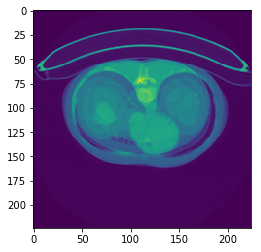

In [15]:
plt.imshow(y_[0,:,:,30,0])
plt.show()

In [17]:
# implementation of VNet in Keras 2.0 and TF = 1.3.0
# keras 1.0 implementation at https://gist.github.com/prinsherbert/8265619db9b05fd7093561e21daf8a28
# Deconvolution3d is deprecated, so I used Conv3DTranspose
# Softmax, downward_layer, upward_layer are updated according to the new functional API of keras
# minor change in the kernel size in the upward layer from the keras 1.0 implemetnation
# input 128x128x64, output 128x128x64x2 probability score for bg and target class
# model is written, need to write image generator, metrics and callbacks section


from keras import backend as K
from keras.engine import Layer

class Softmax(Layer):
    def __init__(self, axis=-1,**kwargs):
        self.axis=axis
        super(Softmax, self).__init__(**kwargs)

    def build(self,input_shape):
        pass

    def call(self, x,mask=None):
        e = K.exp(x - K.max(x, axis=self.axis, keepdims=True))
        s = K.sum(e, axis=self.axis, keepdims=True)
        return e / s

    def compute_output_shape(self, input_shape):
        return input_shape
    
    
def downward_layer(input_layer, n_convolutions, n_output_channels):
    inl = input_layer
    for _ in range(n_convolutions-1):
        inl = PReLU()(Conv3D(filters = (n_output_channels // 2), kernel_size = (5, 5, 5), padding='same')(inl))
    conv = Conv3D(filters = (n_output_channels // 2), kernel_size = (5, 5, 5),  padding='same')(inl)
    add = Add()([conv, input_layer])
    downsample = Conv3D(filters = n_output_channels, kernel_size = (2,2,2), strides=(2,2,2))(add)
    prelu = PReLU()(downsample)
    return prelu, add


def upward_layer(input0 ,input1, n_convolutions, n_output_channels):
    merged = Concatenate()([input0, input1])
    inl = merged
    for _ in range(n_convolutions-1):
        inl = PReLU()(Conv3D(filters = (n_output_channels * 4), kernel_size = (5, 5, 5), padding='same')(inl))
    conv = Conv3D(filters = n_output_channels * 4, kernel_size = (5, 5, 5), padding='same')(inl)
    add = Add()([conv, merged])
    upsample = Conv3DTranspose(filters = n_output_channels, kernel_size = (2,2,2), strides=(2,2,2))(add)
    return PReLU()(upsample)

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.reshape(y_pred, (-1, 2))
    intersection = K.mean(y_true_f * y_pred_f[:,0]) + K.mean((1.0 - y_true_f) * y_pred_f[:,1])
    
    return 2. * intersection;

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [18]:
import keras
from keras.engine.topology import Input
from keras.layers import Conv3D, Concatenate, Add, PReLU, Conv3DTranspose
from keras.models import Model

input_layer = Input(shape=(128, 128, 64, 1))
conv_1 = Conv3D(filters = 16, kernel_size= (5,5,5), strides=(1, 1, 1), padding='same')(input_layer)
repeat_1 = Concatenate()([input_layer] * 16)
add_1 = Add()([conv_1, repeat_1])
prelu_1_1 = PReLU()(add_1)
downsample_1 = Conv3D(filters= 32, kernel_size= (2,2,2), strides =(2,2,2),padding='same') (prelu_1_1)
prelu_1_2 = PReLU()(downsample_1)


out2, left2 = downward_layer(prelu_1_2, 2, 64)
out3, left3 = downward_layer(out2, 2, 128)
out4, left4 = downward_layer(out3, 2, 256)


conv_5_1 = Conv3D(filters= 256, kernel_size=  (5, 5, 4), padding='same')(out4)
prelu_5_1 = PReLU()(conv_5_1)
conv_5_2 = Conv3D(filters= 256, kernel_size=  (5, 5, 4), padding='same')(prelu_5_1)
prelu_5_2 = PReLU()(conv_5_2)
conv_5_3 = Conv3D(filters= 256, kernel_size=  (5, 5, 4), padding='same')(prelu_5_2)
add_5 = Add()([conv_5_3, out4])
prelu_5_1 = PReLU()(add_5)

downsample_5 = Conv3DTranspose(filters = 128, kernel_size = (2,2,2), strides=(2,2,2))(prelu_5_1)
prelu_5_2 = PReLU()(downsample_5)


out6 = upward_layer(prelu_5_2, left4, 3, 64)
out7 = upward_layer(out6, left3, 3, 32)
out8 = upward_layer(out7, left2, 2, 16)

merged_9 = Concatenate()([out8, add_1])
conv_9_1 = Conv3D(filters= 32, kernel_size= (5, 5, 5), padding='same')(merged_9)
add_9 = Concatenate()([conv_9_1, merged_9])
conv_9_2 = Conv3D(filters= 2,kernel_size= (1, 1, 1), padding='same')(add_9)
softmax = Softmax()(conv_9_2)

model = Model(input_layer, softmax)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 128, 128, 64,  0                                            
____________________________________________________________________________________________________
conv3d_14 (Conv3D)               (None, 128, 128, 64,  2016        input_4[0][0]                    
____________________________________________________________________________________________________
concatenate_2 (Concatenate)      (None, 128, 128, 64,  0           input_4[0][0]                    
                                                                   input_4[0][0]                    
                                                                   input_4[0][0]                    
                                                                   input_4[0][0]           